<a href="https://colab.research.google.com/github/Bharasaurus/Census-Income-Project/blob/main/Census_Income_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Census Income Project -

Census data aids in research, investment, and business decisions in both the public and private sectors. The data assists the government in collecting funds for the needy, planning educational systems, creating new job opportunities, and so on

So we are now going to classify the dataset based on their status weather they are earning more than 50k or not using various machine learning algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
census_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Census_Income_Datasets/census-income_final.csv')
census_dataset=census_dataset.rename(columns={'age':'Age',' capital-loss':'Capital_Loss',' native-country':'Native_Country',
                                              ' hours-per-week':'Hours_Per_Week',' capital-gain':'Capital_Gain',' sex':'Sex',
                                              ' race':'Race',' relationship':'Relationship',' occupation':'Occupation',
                                              ' marital-status':'Marital_Status',' education-num':'Education_Num',
                                              ' fnlwgt':'Final_Weight',' workclass':'Work_Class',' education':'Education',' ':'Income'})
census_dataset.head(5)

,Age,Work_Class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
census_dataset.dtypes

Age                 int64
Work_Class         object
Final_Weight        int64
Education          object
Education_Num     float64
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_Per_Week    float64
Native_Country     object
Income             object
dtype: object

In [ ]:
census_dataset.shape

(9270, 15)

In [ ]:
census_dataset.isnull().sum()

Age               0
Work_Class        0
Final_Weight      0
Education         1
Education_Num     1
Marital_Status    1
Occupation        1
Relationship      1
Race              1
Sex               1
Capital_Gain      1
Capital_Loss      1
Hours_Per_Week    1
Native_Country    1
Income            1
dtype: int64

In [ ]:
census_dataset['Work_Class'].value_counts()

 Private             6442
 Self-emp-not-inc     742
 Local-gov            586
 ?                    549
 State-gov            370
 Self-emp-inc         322
 Federal-gov          256
 Without-pay            2
 Never-worked           1
Name: Work_Class, dtype: int64

In [ ]:
census_dataset=census_dataset.replace(" ?", np.nan)
print(census_dataset.isnull().sum())
print("\n")
print(((census_dataset.isnull().sum())/len(census_dataset))*100)

Age                 0
Work_Class        549
Final_Weight        0
Education           1
Education_Num       1
Marital_Status      1
Occupation        551
Relationship        1
Race                1
Sex                 1
Capital_Gain        1
Capital_Loss        1
Hours_Per_Week      1
Native_Country    168
Income              1
dtype: int64


Age               0.000000
Work_Class        5.922330
Final_Weight      0.000000
Education         0.010787
Education_Num     0.010787
Marital_Status    0.010787
Occupation        5.943905
Relationship      0.010787
Race              0.010787
Sex               0.010787
Capital_Gain      0.010787
Capital_Loss      0.010787
Hours_Per_Week    0.010787
Native_Country    1.812298
Income            0.010787
dtype: float64


In [ ]:
census_dataset=census_dataset.dropna()
print(census_dataset.isnull().sum())
print("\n")
print(census_dataset.info())

Age               0
Work_Class        0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 9268
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             8562 non-null   int64  
 1   Work_Class      8562 non-null   object 
 2   Final_Weight    8562 non-null   int64  
 3   Education       8562 non-null   object 
 4   Education_Num   8562 non-null   float64
 5   Marital_Status  8562 non-null   object 
 6   Occupation      8562 non-null   object 
 7   Relationship    8562 non-null   object 
 8   Race            8562 non-null   object 
 9   Sex             8562 non-null   object 
 10  Capital_Gain    8562 non-null   f

In [ ]:
nlist = [i for i in census_dataset.select_dtypes(['int64','float64'])]
nlist

['Age',
 'Final_Weight',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week']

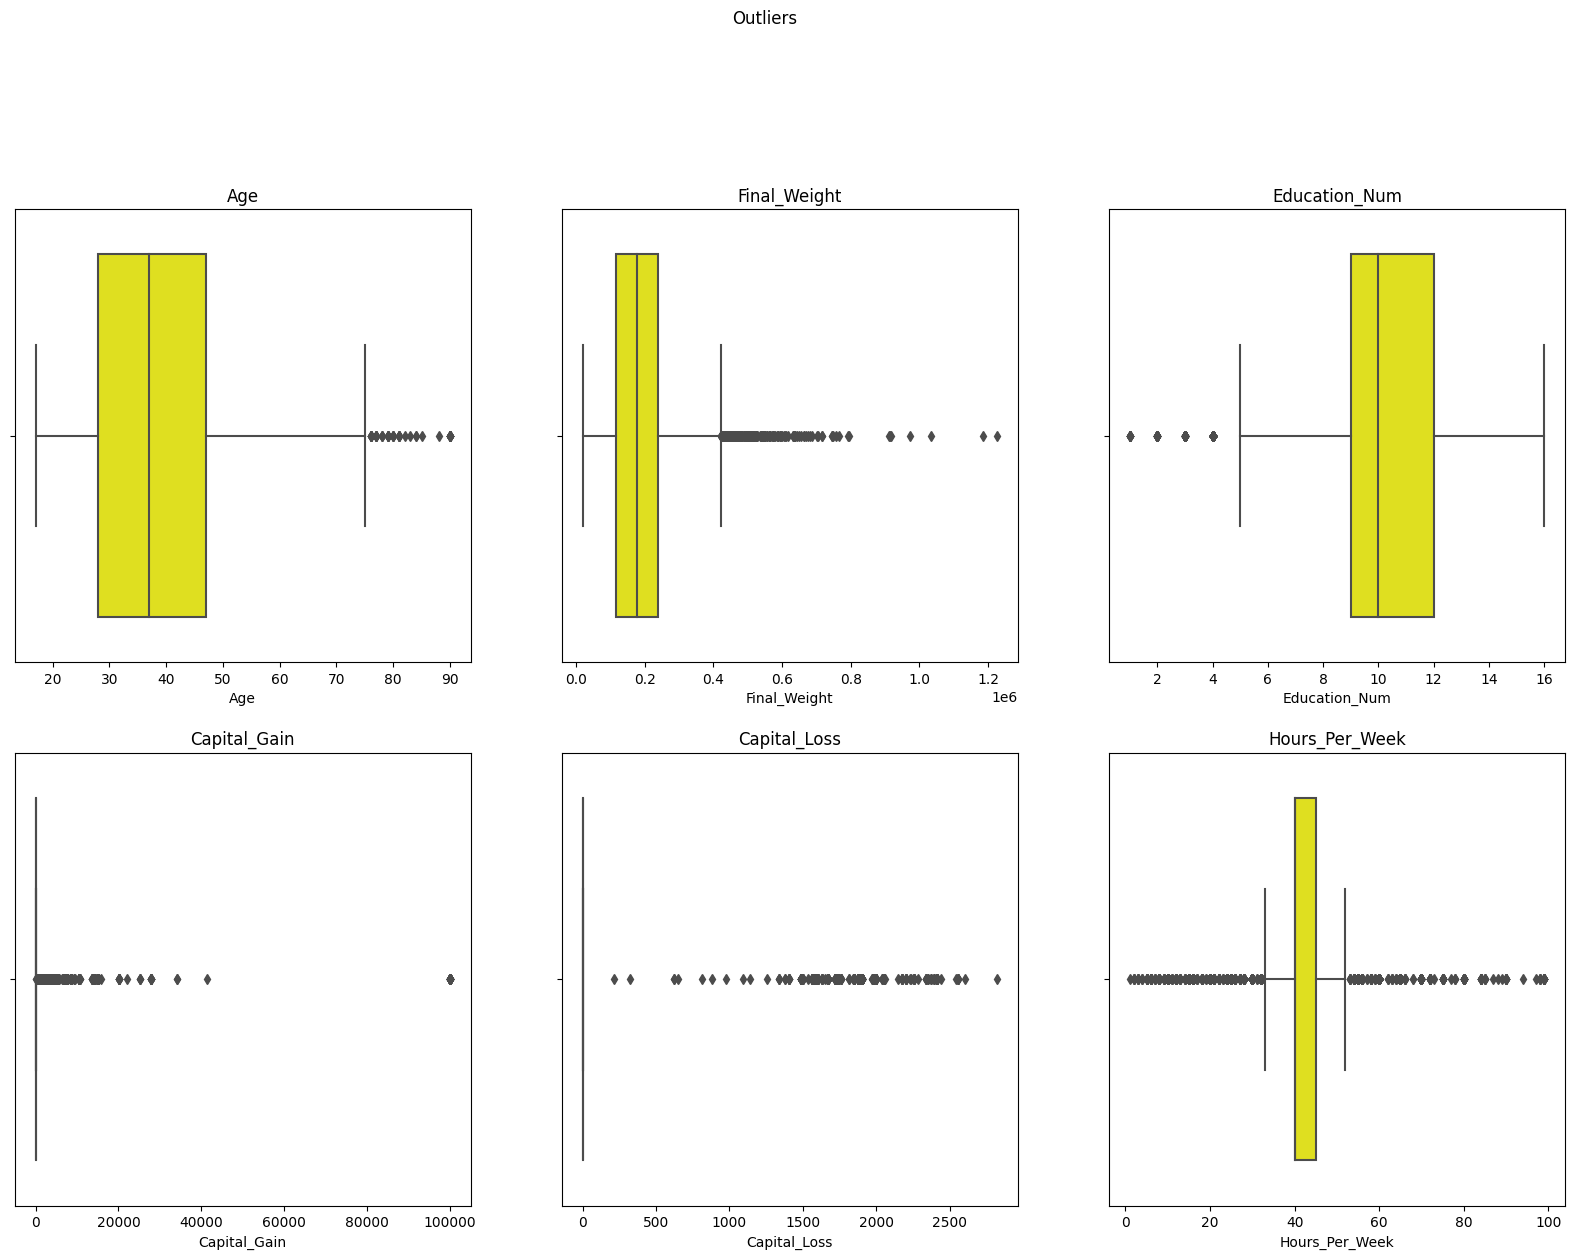

In [ ]:
k=1
plt.figure(figsize=(20,20))
plt.suptitle('Outliers')

for i in census_dataset.loc[:,nlist]:
  plt.subplot(3,3,k)
  sns.boxplot(x=i,data=census_dataset.loc[:,nlist],color='yellow')

  plt.title(i)
  k=k+1
#For Capital Gain and Loss there are very few unique values when compared to the amount of values. So most of them are considered as Outliers
#Many Outliers-->So scaling must be done, thus easing th job of the model (DA)

In [ ]:
#Dropping Duplicates
census_dataset.duplicated().sum()
census_dataset.drop_duplicates(inplace=True)
census_dataset.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing  import LabelEncoder
label_encoder=LabelEncoder()
census_dataset['Work_Class']=label_encoder.fit_transform(census_dataset['Work_Class']) #Label Encoding
for col in census_dataset.columns:
  census_dataset[col]=label_encoder.fit_transform(census_dataset[col])
census_dataset.head() #Label Encoding the Whole Dataset

,Age,Work_Class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,22,5,915,9,12,4,0,1,4,1,16,0,38,37,0
1,33,4,1004,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,4952,11,8,0,5,1,4,1,0,0,38,37,0
3,36,2,5362,1,6,2,5,0,2,1,0,0,38,37,0
4,11,2,6692,9,12,2,9,5,2,0,0,0,38,4,0


In [ ]:
#Standardizing Data/Scaling the Data (Z)
#Used so that it will ease the impact of outliers, make it more suitable for modeling, improve model perfomance
from sklearn.preprocessing import StandardScaler
'''standard_scaler=StandardScaler()
col=census_dataset.columns
census_dataset[col]=standard_scaler.fit_transform(census_dataset[col])
census_dataset'''

'standard_scaler=StandardScaler()\ncol=census_dataset.columns\ncensus_dataset[col]=standard_scaler.fit_transform(census_dataset[col])\ncensus_dataset'

In [ ]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
x=census_dataset.iloc[:,:-1]
y=census_dataset['Income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)
#Random_State - Number Associated will have a certain pattern

In [ ]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
dy_pred=DTC.predict(x_test)
accuracy_score(dy_pred,y_test)

0.7967289719626168

In [ ]:
#Random Forest Tree Algorithm
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
ry_pred=RFC.predict(x_test)
accuracy_score(ry_pred,y_test)

0.8477414330218068